# Importing the libraries

In [79]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('darkgrid')

import statsmodels.api as sm
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Loading the data

In [80]:
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [81]:
bike_df.shape

(730, 16)

In [82]:
bike_df.size

11680

In [83]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [84]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Dropping Irrelevant columns.

In [85]:
bike_df.drop(['instant', 'temp', 'casual', 'registered'], axis = 1, inplace = True)

### changing to date-time format. 

In [86]:
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'], format = '%d-%m-%Y')
bike_df.head() 

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


In [87]:
bike_df['season'].replace(to_replace = [1, 2, 3, 4], value = ['spring', 'summer', 'fall', 'winter'], inplace = True)
bike_df['holiday'].replace(to_replace = [0, 1], value = ['No', 'Yes'], inplace = True)
bike_df['workingday'].replace(to_replace = [0, 1], value = ['No', 'Yes'], inplace = True)
bike_df['weathersit'].replace(to_replace = [1, 2, 3, 4], value = ['Clear', 'Mist', 'Light', 'Heavy'], inplace = True)
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,2018-01-01,spring,0,1,No,1,Yes,Mist,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,0,1,No,2,Yes,Mist,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,0,1,No,3,Yes,Clear,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,0,1,No,4,Yes,Clear,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,0,1,No,5,Yes,Clear,11.46350,43.6957,12.522300,1600


In [88]:
bike_df['weekday'] = bike_df['dteday'].dt.day_name()
bike_df['mnth'] = bike_df['dteday'].dt.month_name()
bike_df['yr'] = bike_df['dteday'].dt.year
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,2018-01-01,spring,2018,January,No,Monday,Yes,Mist,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,2018,January,No,Tuesday,Yes,Mist,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,2018,January,No,Wednesday,Yes,Clear,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,2018,January,No,Thursday,Yes,Clear,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,2018,January,No,Friday,Yes,Clear,11.46350,43.6957,12.522300,1600


# Bivariate Analysis. 


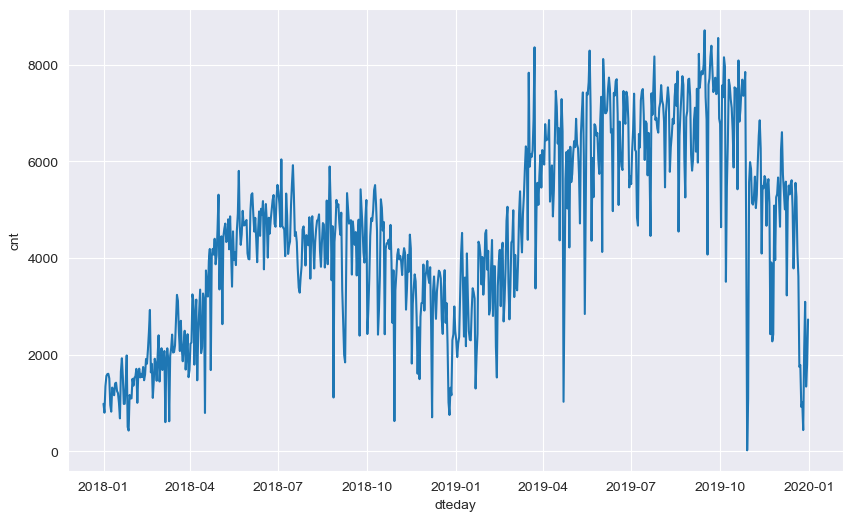

In [89]:
plt.figure(figsize = (10,6))
sns.lineplot(data = bike_df, x = bike_df.dteday, y = 'cnt')
plt.show()

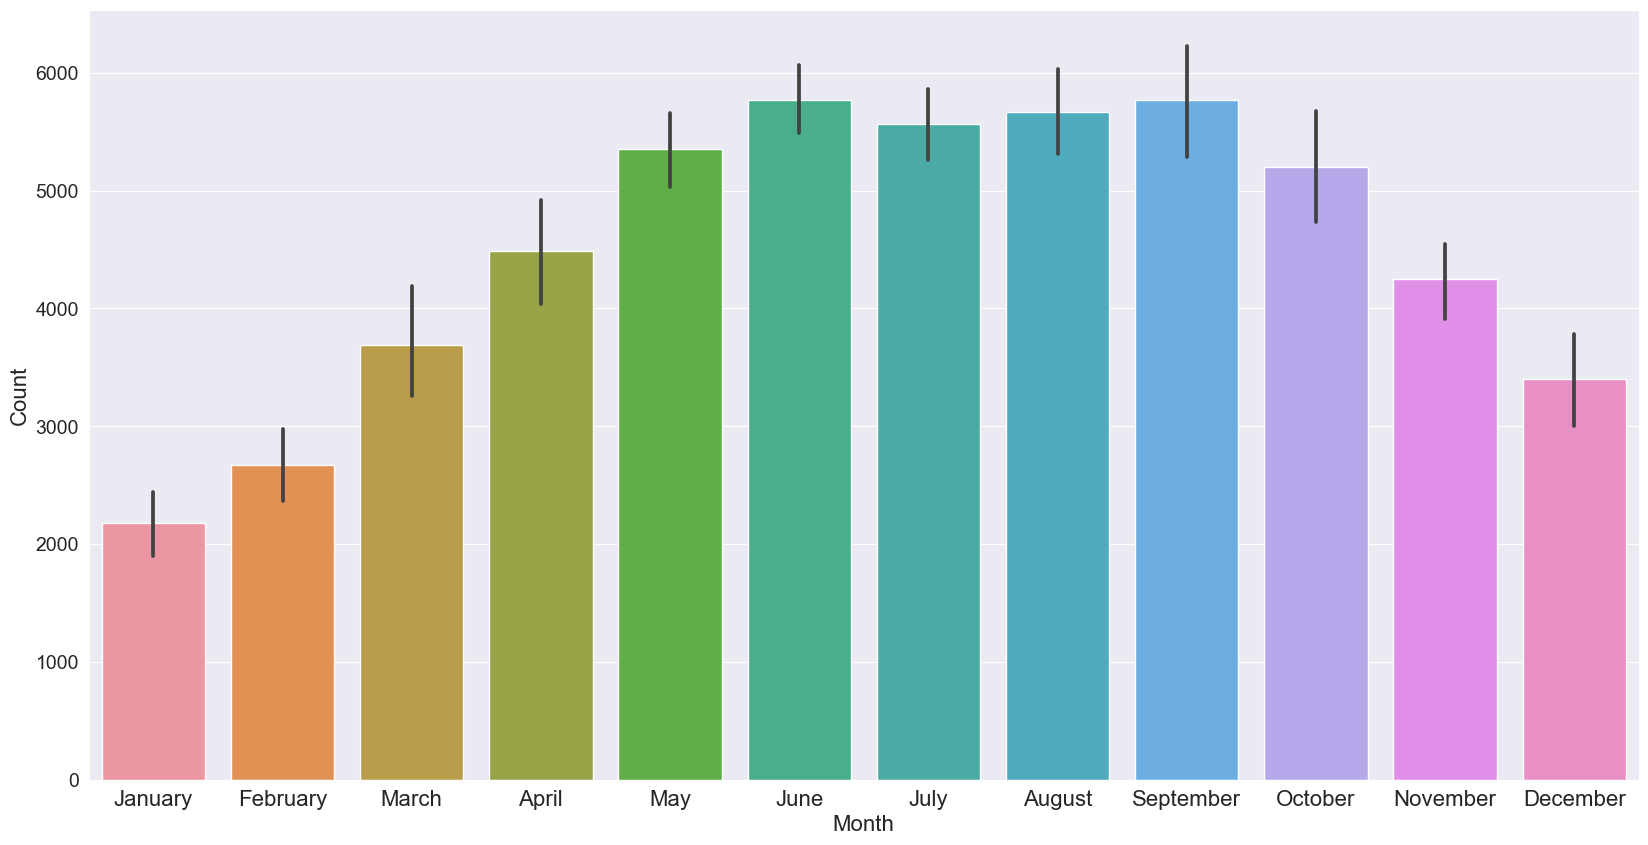

In [90]:
plt.figure(figsize = (20,10))
plt.xticks(size = 16)
plt.yticks(size = 14)
sns.barplot(bike_df, y = "cnt", x = "mnth")
plt.xlabel("Month",size = 16)
plt.ylabel("Count",size = 16)
plt.show()

In [91]:
bike_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,2018-01-01,spring,2018,January,No,Monday,Yes,Mist,18.18125,80.5833,10.749882,985
1,2018-01-02,spring,2018,January,No,Tuesday,Yes,Mist,17.68695,69.6087,16.652113,801
2,2018-01-03,spring,2018,January,No,Wednesday,Yes,Clear,9.47025,43.7273,16.636703,1349
3,2018-01-04,spring,2018,January,No,Thursday,Yes,Clear,10.60610,59.0435,10.739832,1562
4,2018-01-05,spring,2018,January,No,Friday,Yes,Clear,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,spring,2019,December,No,Friday,Yes,Mist,11.33210,65.2917,23.458911,2114
726,2019-12-28,spring,2019,December,No,Saturday,No,Mist,12.75230,59.0000,10.416557,3095
727,2019-12-29,spring,2019,December,No,Sunday,No,Mist,12.12000,75.2917,8.333661,1341
728,2019-12-30,spring,2019,December,No,Monday,Yes,Clear,11.58500,48.3333,23.500518,1796


In [92]:
df = pd.get_dummies(bike_df.iloc[:,1:8], dtype=int)

In [93]:
df.head()

,yr,season_fall,season_spring,season_summer,season_winter,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_No,workingday_Yes,weathersit_Clear,weathersit_Light,weathersit_Mist
0,2018,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,2018,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
2,2018,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
3,2018,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
4,2018,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [94]:
bike_df['atemp'] = bike_df['atemp'].astype(int)
bike_df['hum'] = bike_df['hum'].astype(int)
bike_df['windspeed'] = bike_df['windspeed'].astype(int)

In [95]:
bike_df.drop(bike_df.iloc[:,0:8], axis = 1, inplace = True)

In [96]:
bike_df.head()

,atemp,hum,windspeed,cnt
0,18,80,10,985
1,17,69,16,801
2,9,43,16,1349
3,10,59,10,1562
4,11,43,12,1600


In [97]:
bike_df = pd.concat([df, bike_df], axis = 1)

In [98]:
bike_df

,yr,season_fall,season_spring,season_summer,season_winter,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,...,weekday_Wednesday,workingday_No,workingday_Yes,weathersit_Clear,weathersit_Light,weathersit_Mist,atemp,hum,windspeed,cnt
0,2018,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,18,80,10,985
1,2018,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,17,69,16,801
2,2018,0,1,0,0,0,0,0,0,1,...,1,0,1,1,0,0,9,43,16,1349
3,2018,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,10,59,10,1562
4,2018,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,11,43,12,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,11,65,23,2114
726,2019,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,12,59,10,3095
727,2019,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,12,75,8,1341
728,2019,0,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,11,48,23,1796


In [99]:
bike_df.head()

,yr,season_fall,season_spring,season_summer,season_winter,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,...,weekday_Wednesday,workingday_No,workingday_Yes,weathersit_Clear,weathersit_Light,weathersit_Mist,atemp,hum,windspeed,cnt
0,2018,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,18,80,10,985
1,2018,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,17,69,16,801
2,2018,0,1,0,0,0,0,0,0,1,...,1,0,1,1,0,0,9,43,16,1349
3,2018,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,10,59,10,1562
4,2018,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,11,43,12,1600


In [100]:
bike_df['yr'].replace(to_replace = ['No', 'Yes'], value = [0, 1], inplace = True)

## Assigning Data to x and y

In [101]:
x = bike_df.iloc[:, : -1]
y = bike_df.iloc[:, -1]

## Splitting the Data between train and test data.

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

In [103]:
regression = LinearRegression()
regression

LinearRegression()

# Model building

In [104]:
model = regression.fit(x_train, y_train)

In [105]:
y_train_pred = regression.predict(x_train)

In [106]:
print("Value of MAE : ", mean_absolute_error(y_train, y_train_pred))
print("Value of MSE : ", mean_squared_error(y_train, y_train_pred))
print("R2 Error: ", r2_score(y_train, y_train_pred))

Value of MAE :  545.9763564766769
Value of MSE :  547146.6547108685
R2 Error:  0.8483947760016504


In [107]:
y_test_pred = regression.predict(x_test)

In [108]:
print("Value of MAE : ", mean_absolute_error(y_test, y_test_pred))
print("Value of MSE : ", mean_squared_error(y_test, y_test_pred))
print("R2 Error: ", r2_score(y_test, y_test_pred))

Value of MAE :  614.9336819686474
Value of MSE :  721601.8102225609
R2 Error:  0.8298422795867839
